# Hybrid Quantum Machine Learning

The problem we will attempt to solve is to use Quantum Machine Learning to classify the MNIST dataset using a Variational Quantum Classifier. To solve this problem, we will employ a hybrid of classical and quantum neural networks. We will use a dimension reduced dataset due to the length of time required to solve the entire problem.


This tutorial employs a quantum neural network (QNN) to classify a simplified version of MNIST, in a manner similar to that used by [Edward Farhi and Hartmut Neven](https://arxiv.org/pdf/1802.06002.pdf). The quantum neural network's performance on this classical data problem is compared to that of a classical neural network.

## What we'll tackle

1.   Build understanding of Classical Neural Network
2.   Build image classification using MNIST dataset
3.   Build an understanding of Quantum Neural Network (QNN)
4.   Build hyrbid Quantum Neural Network

## 1. Classical Neural Network


A neural network is loosely modelled after the human brain, with many neurons connected to other neurons, passing information through their connections and firing when a neuron's input exceeds a certain threshold. Our artificial neural network will be made up of artificial neurons and synapses that communicate with one another. The synapses, or connections, will be weighted based on the strength of the neuron's influence in determining the output. These synaptic weights will be optimised using a technique known as backpropagation. Backpropagation will be used for each iteration of the training process to go back through the layers of the network and adjust the weights based on their contribution to the neural net's error.

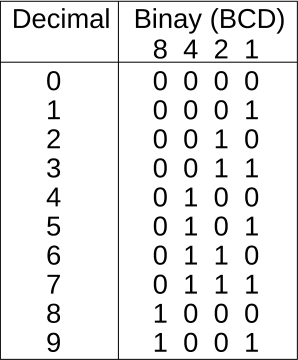

In [ ]:
# import all necessary libraries
from numpy import exp, array, random, dot, tanh

In [ ]:
# Class to create a neural
class NeuralNetwork:
	
	def __init__(self):
		
		# Using seed to make sure weight is constant
		random.seed(42)
		
		# 4x1 Weight matrix
		self.weight_matrix = 2 * random.randn(4, 1) - 1

	# tanh as activation function
	def tanh(self, x):
		return tanh(x)

	# Needed to calculate the gradients.
	def tanh_derivative(self, x):
		return 1.0 - tanh(x) ** 2
		
	# forward propagation
	def forward_propagation(self, inputs):
	    return self.tanh(dot(inputs, self.weight_matrix))
	    
	# training the neural network.
	def train(self, train_inputs, train_outputs, num_train_iterations):
		# Number of iterations we want to
		# perform for this set of input.
		for iteration in range(num_train_iterations):
			output = self.forward_propagation(train_inputs)

			# Calculate the error in the output.
			error = train_outputs - output

			# multiply the error by input and then
			# by gradient of tanh function to calculate
			# the adjustment needs to be made in weights
			adjustment = dot(train_inputs.T, error *
							self.tanh_derivative(output))
							
			# Adjust the weight matrix
			self.weight_matrix += adjustment


In [ ]:
neural_network = NeuralNetwork()

print ('Random weights at the start of training')
print (neural_network.weight_matrix)

train_inputs = array([[0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 0], [1, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [0, 1, 0, 0], [1, 0, 1, 1]])
train_outputs = array([[0, 0, 1, 1, 1, 1, 1, 1]]).T

neural_network.train(train_inputs, train_outputs, 10000)

print ('New weights after training')
print (neural_network.weight_matrix)

# Test the neural network with a new situation.
print ("Testing network on new examples ->")
print (neural_network.forward_propagation(array([1, 0, 1, 1])))

Random weights at the start of training
[[-0.00657169]
 [-1.2765286 ]
 [ 0.29537708]
 [ 2.04605971]]
New weights after training
[[ 0.89503917]
 [ 0.89503917]
 [ 0.89503917]
 [-1.02200471]]
Testing network on new examples ->
[0.6458079]


In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data and split it to train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()


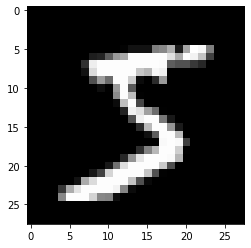

In [ ]:
# Looking at actual data in image form
plt.imshow(x_train[0], cmap='gray')

In [ ]:
# The actual label for the above image
y_train[0]

5

In [ ]:
# Lets check the shape for our images
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
# To feed MNIST instances into a neural network, they need to be reshaped, from a 2 dimensional image representation to a single dimension sequence
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


In [ ]:
# Casting to floats
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


In [ ]:
# Converting target to binary class matrix
classes = 10
y_train = tensorflow.keras.utils.to_categorical(y_train, classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, classes)


In [ ]:
# Lets start with a simple model with 1 hidden layers
model_1 = Sequential()
model_1.add(Dense(64, activation="relu", input_shape=(784, )))
model_1.add(Dropout(0.3))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=.001), metrics=['accuracy'])


In [ ]:
history = model_1.fit(x_train, y_train, batch_size=1024, epochs=10, verbose=1, validation_data=(x_test, y_test))


Epoch 1/10
59/59 [==============================] - 2s 16ms/step - loss: 1.2844 - accuracy: 0.5893 - val_loss: 0.4487 - val_accuracy: 0.8842
Epoch 2/10
59/59 [==============================] - 1s 10ms/step - loss: 0.5573 - accuracy: 0.8339 - val_loss: 0.2907 - val_accuracy: 0.9182
Epoch 3/10
59/59 [==============================] - 1s 11ms/step - loss: 0.4196 - accuracy: 0.8785 - val_loss: 0.2389 - val_accuracy: 0.9279
Epoch 4/10
59/59 [==============================] - 1s 11ms/step - loss: 0.3590 - accuracy: 0.8964 - val_loss: 0.2079 - val_accuracy: 0.9365
Epoch 5/10
59/59 [==============================] - 1s 9ms/step - loss: 0.3219 - accuracy: 0.9080 - val_loss: 0.1911 - val_accuracy: 0.9419
Epoch 6/10
59/59 [==============================] - 1s 10ms/step - loss: 0.2914 - accuracy: 0.9148 - val_loss: 0.1754 - val_accuracy: 0.9469
Epoch 7/10
59/59 [==============================] - 1s 9ms/step - loss: 0.2696 - accuracy: 0.9211 - val_loss: 0.1628 - val_accuracy: 0.9506
Epoch 8/10
59/5

In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13723327219486237
Test accuracy: 0.9574999809265137


In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-d', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-d', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-d', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-d', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

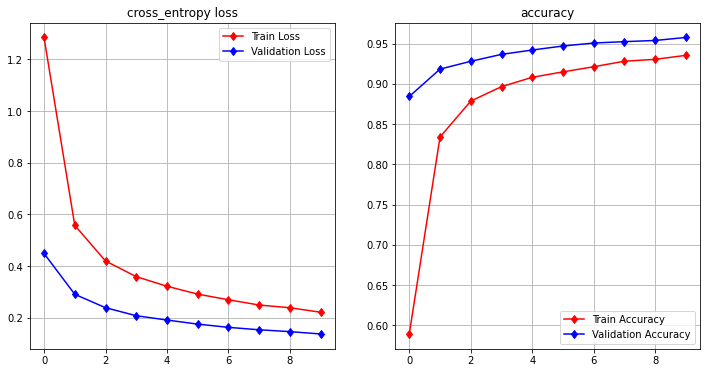

In [ ]:
plot_loss_accuracy(history)

### Exercise
#### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Three hidden layers.
2. Layers
 - First 300
 - Second 200
 - Third 100
3. Dropout of .4 at each layer
4. How many parameters does your model have?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


5


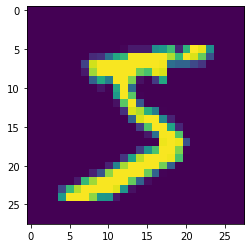

In [ ]:
# Lets look at one of the images and its label
print(y_train[0])
plt.imshow(x_train[0])

In [ ]:
classes = 10

y_train = tensorflow.keras.utils.to_categorical(y_train, classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, classes)


In [ ]:
# Making everything to be float and scale
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### Conv2D

```python
keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```
When using this layer as the first layer in a model, provide the keyword argument input_shape

- `filters`: Integer, the number of output filters in the convolution.
- `kernel_size`: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `activation`: Activation function to use. If you don't specify anything, no activation is applied.


Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
```python
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
```

- `pool_size`: Integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal).
- `strides`: Integer, tuple of 2 integers, or None. Strides values.

### Flatten
```python
keras.layers.Flatten(data_format=None)
```
Turns its input into a one-dimensional vector (per instance). Usually used when transitioning between convolutional layers and fully connected layers.

### Activation
```python
keras.layers.Activation(activation)
```

Applies an activation function to the output

### Sequential
The Sequential model is a linear stack of layers. You can create a Sequential model by passing a list of layer instances to the constructor



In [ ]:

model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (4, 4), strides = (2,2)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.3))
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 activation_1 (Activation)   (None, 12, 12, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 64)         0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 64)          0         
                                                      

In [ ]:
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005, decay=1e-6), metrics=['accuracy'])
model_1.fit(x_train, y_train, batch_size=1024, epochs=10, validation_data=(x_test, y_test), shuffle=True)


Epoch 1/10
59/59 [==============================] - 9s 92ms/step - loss: 0.5775 - accuracy: 0.8155 - val_loss: 0.1201 - val_accuracy: 0.9655
Epoch 2/10
59/59 [==============================] - 4s 71ms/step - loss: 0.1439 - accuracy: 0.9557 - val_loss: 0.0655 - val_accuracy: 0.9805
Epoch 3/10
59/59 [==============================] - 4s 74ms/step - loss: 0.1004 - accuracy: 0.9693 - val_loss: 0.0515 - val_accuracy: 0.9838
Epoch 4/10
59/59 [==============================] - 4s 63ms/step - loss: 0.0789 - accuracy: 0.9753 - val_loss: 0.0411 - val_accuracy: 0.9862
Epoch 5/10
59/59 [==============================] - 4s 63ms/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0374 - val_accuracy: 0.9880
Epoch 6/10
59/59 [==============================] - 4s 63ms/step - loss: 0.0592 - accuracy: 0.9817 - val_loss: 0.0330 - val_accuracy: 0.9878
Epoch 7/10
59/59 [==============================] - 4s 65ms/step - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.0297 - val_accuracy: 0.9905
Epoch 8/10
59

In [ ]:

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025894302874803543
Test accuracy: 0.9908000230789185


### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> Flatten -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> Flatten -> Dense -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have


## 2. Quantum Circuits

In [ ]:
!pip install qiskit pylatexenc

In [ ]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_state_city

In [ ]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [ ]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

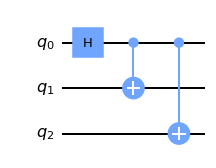

In [ ]:
circ.draw('mpl')

In [ ]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [ ]:
# Create a Quantum Program for execution
job = backend.run(circ)

In [ ]:
result = job.result()

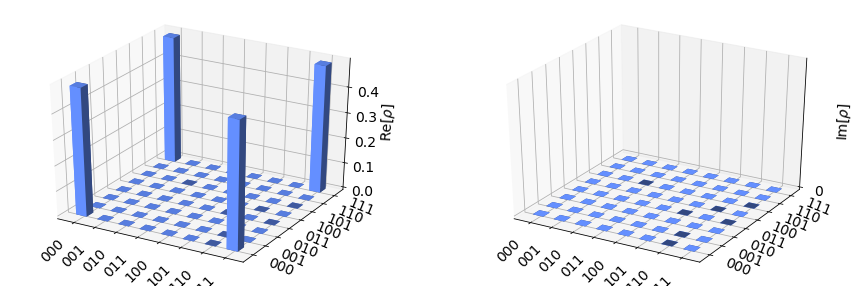

In [ ]:
outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)

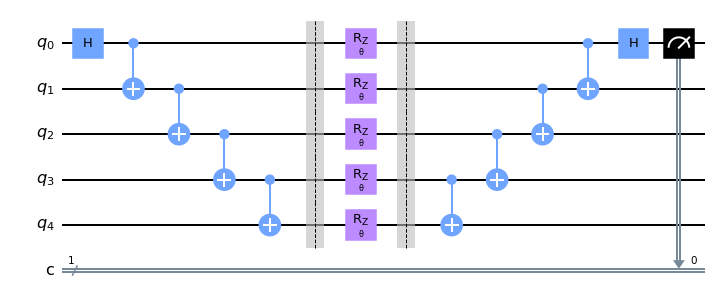

In [ ]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

In [ ]:
theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw()

┌───┐                     ░ ┌────────┐ ░                     ┌───┐┌─┐
q_0: ┤ H ├──■──────────────────░─┤ Rz(2π) ├─░──────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐                ░ ├────────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──■─────────────░─┤ Rz(2π) ├─░─────────────■──┤ X ├──────╫─
          └───┘┌─┴─┐           ░ ├────────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: ──────────┤ X ├──■────────░─┤ Rz(2π) ├─░────────■──┤ X ├───────────╫─
               └───┘┌─┴─┐      ░ ├────────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: ───────────────┤ X ├──■───░─┤ Rz(2π) ├─░───■──┤ X ├────────────────╫─
                    └───┘┌─┴─┐ ░ ├────────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: ────────────────────┤ X ├─░─┤ Rz(2π) ├─░─┤ X ├─────────────────────╫─
                         └───┘ ░ └────────┘ ░ └───┘                     ║ 
c: 1/═══════════════════════════════════════════════════════════════════╩═
                                                                        0

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuits, backend))
counts = job.result().get_counts()

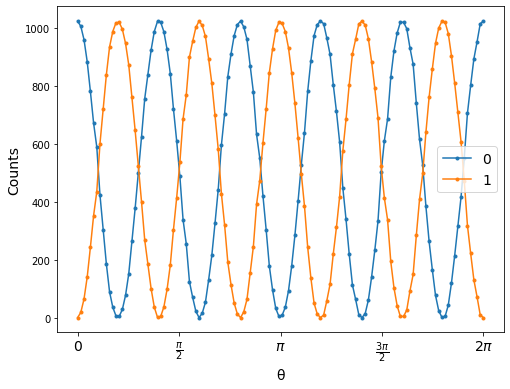

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

## 3. Quantum NN

Check out [this repo](https://github.com/0x6f736f646f/variational-quantum-classifier-on-heartattack/tree/main/Src/Notebooks)


## 4. Hyrbid Quantum Neural Network


### Install packages

If you have the packages installed feel free to skip this code block

In [ ]:
!pip install tensorflow==2.7.0 tensorflow-quantum
!pip install pennylane --upgrade

     |████████████████████████████████| 489.6 MB 27 kB/s 
     |████████████████████████████████| 10.5 MB 20.8 MB/s 
     |████████████████████████████████| 463 kB 47.2 MB/s 
     |████████████████████████████████| 1.3 MB 38.0 MB/s 
     |████████████████████████████████| 90 kB 8.8 MB/s 
     |████████████████████████████████| 90 kB 9.6 MB/s 
     |████████████████████████████████| 6.1 MB 35.5 MB/s 
     |████████████████████████████████| 541 kB 35.5 MB/s 
     |████████████████████████████████| 100 kB 10.3 MB/s 
     |████████████████████████████████| 1.8 MB 38.7 MB/s 
     |████████████████████████████████| 93 kB 1.6 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 93 kB 1.6 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 93 kB 1.2 MB/s 
     |█████████████████████████

     |████████████████████████████████| 914 kB 5.2 MB/s 
     |████████████████████████████████| 8.8 MB 20.7 MB/s 
     |████████████████████████████████| 108 kB 48.1 MB/s 


Import modules and dependecies

In [ ]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

### Load the data
We will build a binary classifier to distinguish between the digits 8 and 7. We will:
- Load data from Keras.
- Filters the dataset to only 8s and 7s.
- Downscales the images.
- Converts the binary images.
- Converts the Cirq circuits to TensorFlow Quantum circuit


Load data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


In [ ]:
def filter_87(x, y):
    keep = (y == 8) | (y == 7)
    x, y = x[keep], y[keep]
    y = y == 8
    return x,y

In [ ]:
x_train, y_train = filter_87(x_train, y_train)
x_test, y_test = filter_87(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12116
Number of filtered test examples: 2002


False


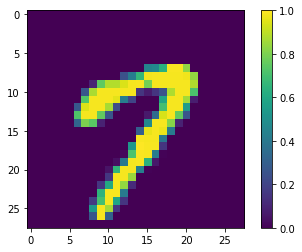

In [ ]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

Downscale the data

In [ ]:
x_train_small = tf.image.resize(x_train, (4,4)).numpy()
x_test_small = tf.image.resize(x_test, (4,4)).numpy()

False


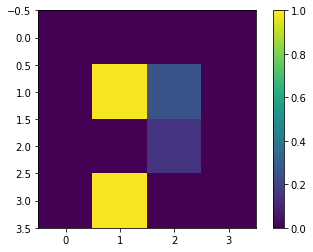

In [ ]:
print(y_train[0])

plt.imshow(x_train_small[0,:,:,0], vmin=0, vmax=1)
plt.colorbar()

In [ ]:
def remove_contradicting(xs, ys):
    mapping = collections.defaultdict(set)
    orig_x = {}
    # Determine the set of labels for each unique image:
    for x,y in zip(xs,ys):
       orig_x[tuple(x.flatten())] = x
       mapping[tuple(x.flatten())].add(y)

    new_x = []
    new_y = []
    for flatten_x in mapping:
      x = orig_x[flatten_x]
      labels = mapping[flatten_x]
      if len(labels) == 1:
          new_x.append(x)
          new_y.append(next(iter(labels)))
      else:
          # Throw out images that match more than one label.
          pass

    num_uniq_8 = sum(1 for value in mapping.values() if len(value) == 1 and True in value)
    num_uniq_7 = sum(1 for value in mapping.values() if len(value) == 1 and False in value)
    num_uniq_both = sum(1 for value in mapping.values() if len(value) == 2)

    print("Number of unique images:", len(mapping.values()))
    print("Number of unique 8s: ", num_uniq_8)
    print("Number of unique 7s: ", num_uniq_7)
    print("Number of unique contradicting labels (both 8 and 7): ", num_uniq_both)
    print()
    print("Initial number of images: ", len(xs))
    print("Remaining non-contradicting unique images: ", len(new_x))

    return np.array(new_x), np.array(new_y)

In [ ]:
x_train_nocon, y_train_nocon = remove_contradicting(x_train_small, y_train)

Number of unique images: 11127
Number of unique 8s:  5542
Number of unique 7s:  5483
Number of unique contradicting labels (both 8 and 7):  102

Initial number of images:  12116
Remaining non-contradicting unique images:  11025


In [ ]:
THRESHOLD = 0.5

x_train_bin = np.array(x_train_nocon > THRESHOLD, dtype=np.float32)
x_test_bin = np.array(x_test_small > THRESHOLD, dtype=np.float32)

In [ ]:
_ = remove_contradicting(x_train_bin, y_train_nocon)

Number of unique images: 173
Number of unique 8s:  67
Number of unique 7s:  41
Number of unique contradicting labels (both 8 and 7):  65

Initial number of images:  11025
Remaining non-contradicting unique images:  108


In [ ]:
def convert_to_circuit(image):
    """Encode truncated classical image into quantum datapoint."""
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4, 4)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
        if value:
            circuit.append(cirq.X(qubits[i]))
    return circuit


x_train_circ = [convert_to_circuit(x) for x in x_train_bin]
x_test_circ = [convert_to_circuit(x) for x in x_test_bin]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


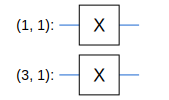

In [ ]:
SVGCircuit(x_train_circ[0])

In [ ]:
bin_img = x_train_bin[0,:,:,0]
indices = np.array(np.where(bin_img)).T
indices

array([[1, 1],
       [3, 1]])

In [ ]:
x_train_tfcirc = tfq.convert_to_tensor(x_train_circ)
x_test_tfcirc = tfq.convert_to_tensor(x_test_circ)

In [ ]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout

    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

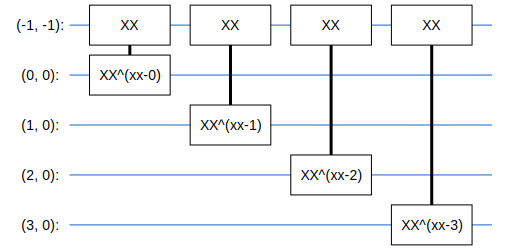

In [ ]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout=cirq.GridQubit(-1,-1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='xx')
SVGCircuit(circuit)

In [ ]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(4, 4)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [ ]:
model_circuit, model_readout = create_quantum_model()

In [ ]:
# Build the Keras model.
model = tf.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tfq.layers.PQC(model_circuit, model_readout),
    tf.keras.layers.Input(shape=(), dtype=tf.string),

])

In [ ]:
y_train_hinge = 2.0*y_train_nocon-1.0
y_test_hinge = 2.0*y_test-1.0

In [ ]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [ ]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pqc (PQC)                   (None, 1)                 32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
EPOCHS = 10
BATCH_SIZE = 512

NUM_EXAMPLES = len(x_train_tfcirc)

In [ ]:
x_train_tfcirc_sub = x_train_tfcirc[:NUM_EXAMPLES]
y_train_hinge_sub = y_train_hinge[:NUM_EXAMPLES]

In [ ]:
qnn_history = model.fit(
      x_train_tfcirc_sub, y_train_hinge_sub,
      batch_size=32,
      epochs=EPOCHS,
      verbose=1,
      validation_data=(x_test_tfcirc, y_test_hinge))

qnn_results = model.evaluate(x_test_tfcirc, y_test)

Epoch 1/10
345/345 [==============================] - ETA: 0s - loss: 0.9761 - hinge_accuracy: 0.5439

## 5. References

1. [refinitiv article](https://developers.refinitiv.com/en/article-catalog/article/tensorflow-variational-quantum-neural-networks-in-finance)
2. [Qiskit tutorial](https://qiskit.org/textbook/ch-machine-learning/machine-learning-qiskit-pytorch.html?ref=morioh.com&utm_source=morioh.com)
3. [Tensorflow QCONV](https://www.tensorflow.org/quantum/tutorials/qcnn)
4. [Variational Quantum Classifier](https://github.com/0x6f736f646f/variational-quantum-classifier-on-heartattack)
5. [Blog on VQC](https://rodneyosodo.medium.com/qa1-my-quantum-open-source-foundation-project-402d4f1df1a5)
6. [Google tensorflow with cirq](https://www.tensorflow.org/quantum/tutorials/mnist#2_quantum_neural_network)
7. [Classification with Quantum Neural Networks
on Near Term Processors](https://arxiv.org/pdf/1912.06184.pdf)
8. [Implement A Hybrid Quantum Classical Neural Network With Qiskit](https://medium.com/qiskit/implement-a-hybrid-quantum-classical-neural-network-with-qiskit-7f732ed3b42a)
9. [Mnist hybrid QNN](https://w11wo.github.io/posts/2020/07/mnist-hybrid-qnn/)
10. [Pennylane](https://pennylane.ai/qml/demos/tutorial_quanvolution.html)
11. []()

